# 9绘图和可视化
## 9.1matplotlib API入门

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

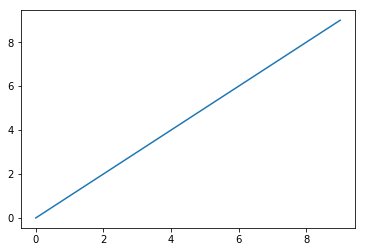

In [6]:
plt.plot(data)

### 9.1.1Figure和Subplot

In [7]:
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [8]:
ax1 = fig.add_subplot(2,2,1)


In [9]:
ax2 = fig.add_subplot(2,2,2)

In [10]:
ax3 = fig.add_subplot(2,2,3)

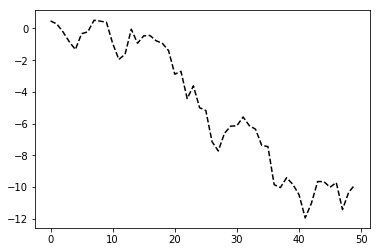

In [11]:
plt.plot(np.random.randn(50).cumsum(),'k--')

### 9.1.2调整subplot周围的间距

matplotlib绘图时，subplot外围会留有空白边距，各个subplot之间也留有间距。
调整这两种间距的大小。用subplots_ajust(left=,bottom=,right=,top=,wspace=,hspace)函数，来设置。

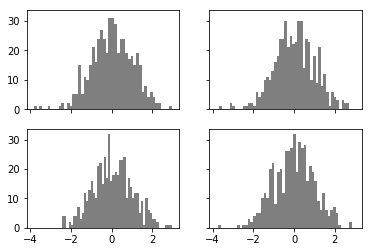

In [12]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',
        alpha=0.5)
#plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [13]:
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

<Figure size 432x288 with 0 Axes>

### 9.1.3 颜色、标记和线型

matplotlib的plot函数，接受一组x,y坐标，还接受一个表示颜色和线型的字符串缩写。
ax.plot(x,y,'g--')
或
ax.plot(x,y,linestyle='--',color='g')


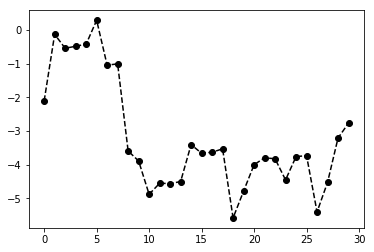

In [14]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')

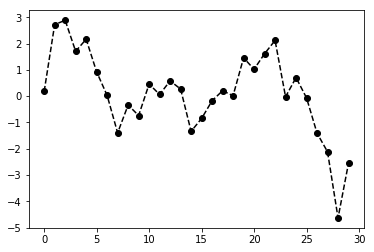

In [15]:
plt.plot(randn(30).cumsum(),color='k',linestyle='--',marker='o')

In [16]:
data = np.random.randn(30).cumsum()
data

array([-0.33785194,  0.74616614,  1.11631158,  0.47059422,  0.724783  ,
        0.59241262, -1.127281  , -0.50720637, -0.72729578, -1.04554678,
       -1.18214719, -1.42718315, -1.76714498, -3.73220408, -4.07524617,
       -4.53733181, -4.1565723 , -5.57480024, -4.32934327, -4.74431686,
       -4.87066271, -5.29136492, -5.72574177, -6.00156427, -6.11906261,
       -6.69857107, -6.38061493, -5.93591378, -4.01883461, -3.75985309])

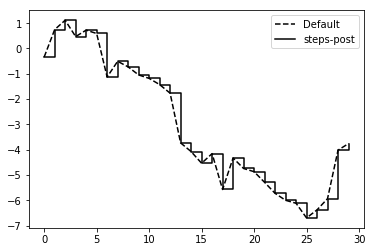

In [17]:
plt.plot(data,'k--',label='Default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

### 9.1.4刻度、标签和图例

图标装饰，有两种实现方式：1、使用过程型pyplot接口，例如matplotlib.pyplot；2、面向对象的matplotlib API。


### 9.1.5设置标题、轴标签、刻度和刻度标签

### 9.1.6添加图例

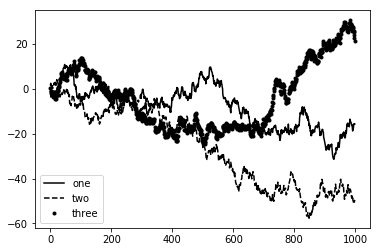

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')


In [19]:
#调整刻度，使用set_xticks和set_xticklabels
ax.legend?

### 9.1.7注解以及在Subplot上绘图

对绘图进行注解，添加文本、箭头或其他图形进行说明，可以通过text、arrow和annotate函数进行添加。
ax.text(x,y,'hello world',
family='monospace',fontsize=10)

In [20]:
from datetime import datetime

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

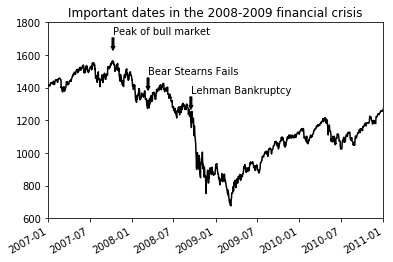

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']
spx.plot(ax = ax,style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [22]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

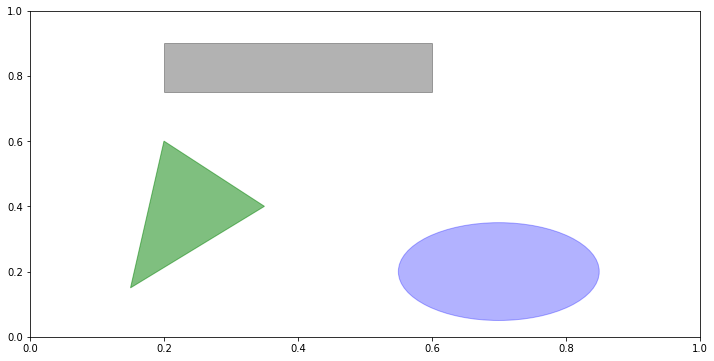

In [23]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.9matplotlib配置

配置图像大小、subplot边距、配色方案、字体大小、网格类型等

## 9.2使用pandas和seaborn绘图
### 9.2.1线型图
Series和DataFrame都有用于生成各种类图表的plot方法，默认情况下生成线型图。

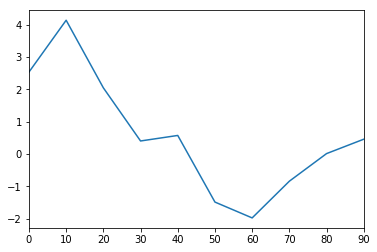

In [24]:
s= pd.Series(np.random.randn(10).cumsum(),
            index=np.arange(0,100,10))
s.plot()

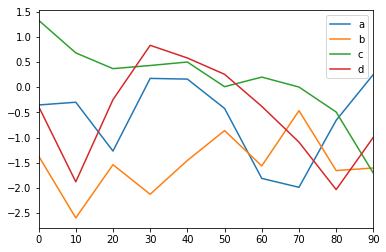

In [25]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
            columns = ['a','b','c','d'],
            index=np.arange(0,100,10))
df.plot()

### 9.2.2柱状图

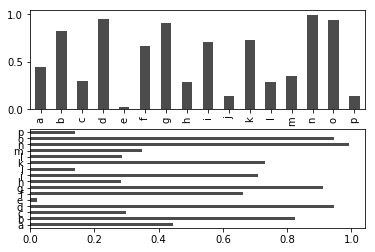

In [26]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [27]:
np.random.seed(12348)

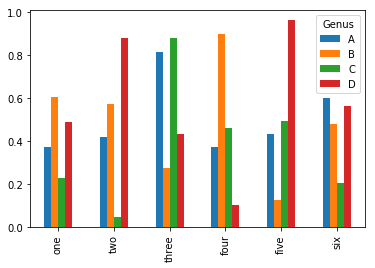

In [28]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

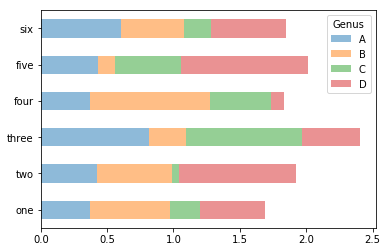

In [29]:
df.plot.barh(stacked=True, alpha=0.5)

### 9.2.3 直方图和密度图

In [32]:
#plt.figure()
#tips = pd.read_csv('tips.csv')
print(tips.columns)
tips.head()
#tips['tip_pct'].plot.hist(bins=50)
#plt.figure()

Index(['total_bill', 'tip', 'smoker', 'day', 'time', 'size'], dtype='object')


,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


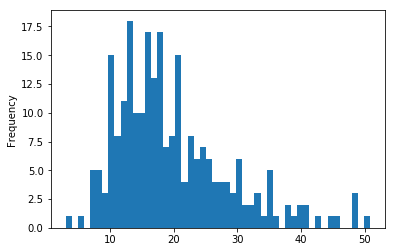

In [33]:
tips['total_bill'].plot.hist(bins=50)

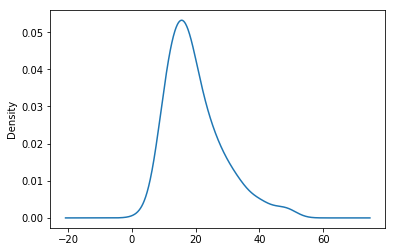

In [34]:
tips.total_bill.plot.density()

In [35]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))

In [36]:
values.head()

0    0.203887
1   -2.213737
2    0.315042
3   -0.137200
4    0.036238
dtype: float64

In [37]:
import seaborn as sns


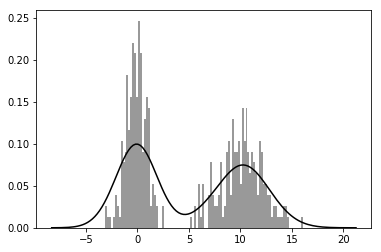

In [38]:
sns.distplot(values,bins=100,color='k')

### 9.2.4散布图和点图

In [40]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


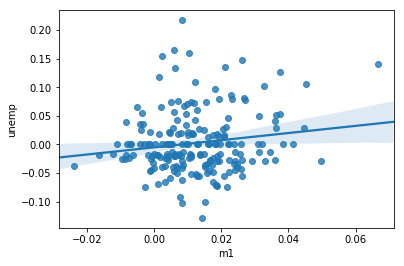

In [41]:
sns.regplot('m1','unemp',data=trans_data)
#散布图 + 线性回归曲线

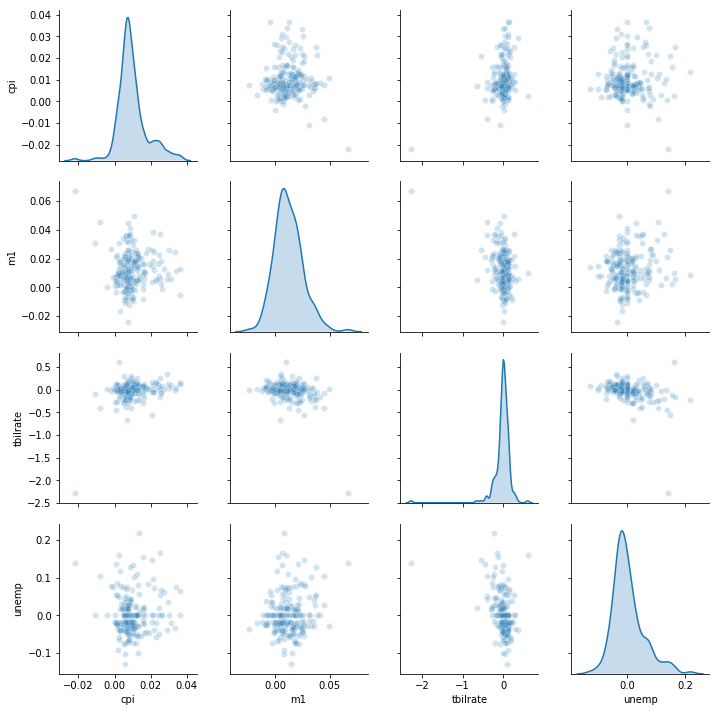

In [42]:
#散布图矩阵
sns.pairplot(trans_data,diag_kind='kde',
            plot_kws={'alpha':0.2})

C:\Users\Zelon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


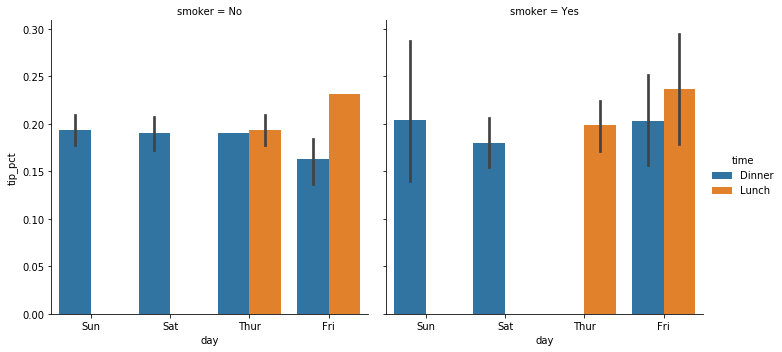

In [45]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\Zelon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


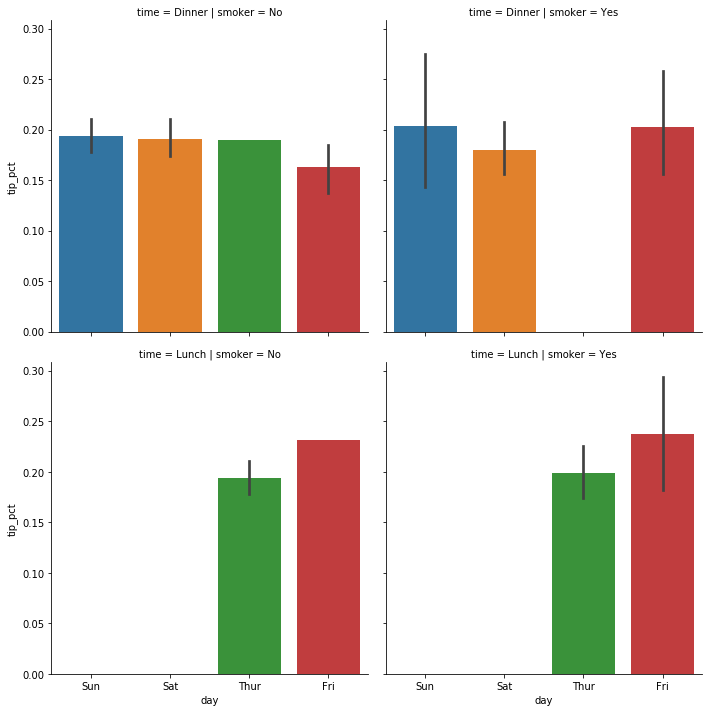

In [46]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\Zelon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


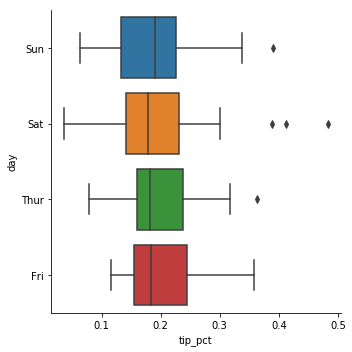

In [47]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

# 作业 ：matplotlib对iris可视化

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
irisdata = pd.read_csv('iris.csv')

In [50]:
irisdata.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [51]:
irisdata.dropna(how='all',inplace=True)

In [52]:
irisdata.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [53]:
from sklearn.preprocessing import LabelEncoder

In [79]:
X = irisdata[['Sepal.Length','Sepal.Width','Petal.Width']].values
#y = irisdata['class label'].values
y = irisdata['Species'].values


In [81]:
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)
label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

## pie chart

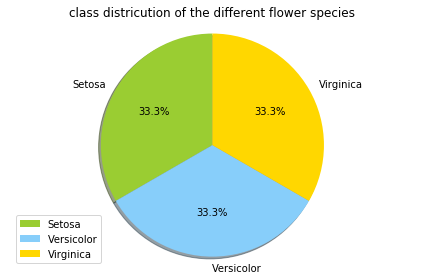

In [85]:
plt.pie([X[y==i].shape[0] for i in range(3)],
       labels=[label_dict[i] for i in range(3)],
       shadow=True,
       colors=('yellowGreen','lightskyblue','gold'),
       startangle=90,
       autopct='%1.1f%%')
plt.title('class districution of the different flower species')
plt.axis('equal')
plt.legend(fancybox=True,loc='best')
plt.tight_layout()
plt.show()

## bar chart

In [86]:
mean_values = [X[y==i,:].mean(axis=0) for i in range(3)]

In [88]:
attr_dict = {0: 'sepal length', 
            1:  'sepal width', 
            2:  'petal length', 
            3:  'petal width'}
labels = [attr_dict[i] for i in range(4)]

In [89]:
labels


['sepal length', 'sepal width', 'petal length', 'petal width']

In [90]:
pos = np.arange(4)
width = 0.2